In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import sympy as sp

x = sp.Symbol('x')
a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')
k = sp.Symbol('k')

class regressao:
    def __init__(self, xx, yy, func, coefs):
        self.func = sp.lambdify([x, *coefs], func)
        if func.has(sp.exp):
            yy = np.log(yy)
            func = sp.log(func).expand(force=True)
        else:
            termosPol = 0
            for termo in func.expand().args: 
                termosPol = termosPol + termo.is_polynomial()
            if termosPol == 0:
                
                yy = 1/yy
                func = (1/func).expand(force=True)
            elif termosPol < len(func.expand().args):
                
                yy = yy*xx
                func = (func*x).expand(force=True)
        func = sp.lambdify([x, *coefs], func)
        self.coef, _ = opt.curve_fit(func, xx, yy)

### 1) Encontre a reta $y=a_1+a_2 x$ que melhor se ajusta aos pontos com coordenadas $x=[0, 0.2, 0.4, 0.6, 0.8, 1]$ e $y=\sin(x+6)$. Forneça como respostas o coeficente $a_1$.

0.944087272159967*x - 0.269262699879176


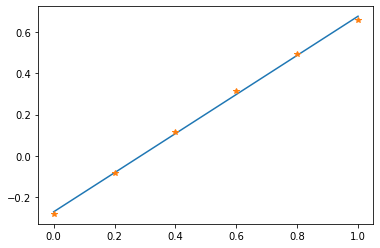

In [16]:
x1 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
y1 = np.sin(x1+6)
fit1 = np.poly1d(np.polyfit(x1, y1, 1))
fit1(x)
plt.plot(x1, fit1(x1))
plt.plot(x1, y1, '*')
print(fit1(x).expand())

### 2) Dados os pontos $x=0:0.2:1$ e $y=\cos(x+34)$, encontre a reta $y=ax+b$ que melhor se ajusta a esses pontos. Forneça como resposta o coeficiente $a$?

-0.0555743232431132*x - 0.913294996545721


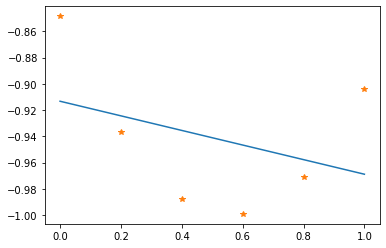

In [3]:
x2 = np.arange(0, 1+0.2, 0.2)
y2 = np.cos(x2+34)
fit2 = np.poly1d(np.polyfit(x2, y2, 1))
fit2(x)
plt.plot(x2, fit2(x2))
plt.plot(x2, y2, '*')
print(fit2(x).expand())

### 3) Dados os pontos $x=1:0.5:12$ e $y=3\sin(x+21)+x^2$, encontre o polinômio de grau 2 que melhor se ajusta a esses pontos. Forneça como resposta o coeficiente de $x^2$.

0.998042233825109*x**2 + 0.212169860415472*x - 1.46222961618302


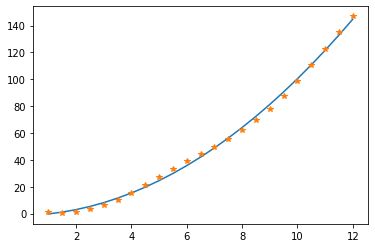

In [4]:
x3 = np.arange(1, 12+0.5, 0.5)
y3 = 3*np.sin(x3+21)+x3**2
fit3 = np.poly1d(np.polyfit(x3, y3, 2))
fit3(x)
plt.plot(x3, fit3(x3))
plt.plot(x3, y3, '*')
print(fit3(x).expand())

### 4) Dados os pontos $x=1:0.5:12$ e $y=17*\sin(x)+x^2$, encontre a parábola $p(x)$ que que melhor se ajusta a esses pontos. Forneça como resposta $p(3.14)$.

0.99658694749936*x**2 - 1.4010360858794*x + 8.96181849038974
14.38851384829313


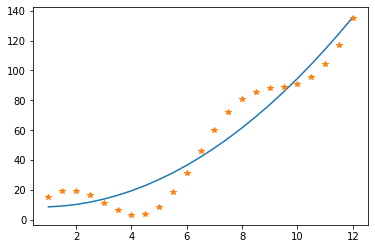

In [5]:
x4 = np.arange(1, 12+0.5, 0.5)
y4 = 17*np.sin(x4)+x4**2
fit4 = np.poly1d(np.polyfit(x4, y4, 2))
p4 = 3.14
fit4(x)
plt.plot(x4, fit4(x4))
plt.plot(x4, y4, '*')
print(fit4(x).expand())
print(fit4(p4))

### 5) Dados os pontos $x=1:0.1:4$ e $y=\sin(4+1/x)$, encontre o polinômio $p(x)$ de grau 3 que melhor se ajusta a esses pontos. Calcule $p(2.1)$.

-0.0141331173454932*x**3 + 0.113331087852703*x**2 - 0.244855358592197*x - 0.831408969071529
-0.9767019244213369


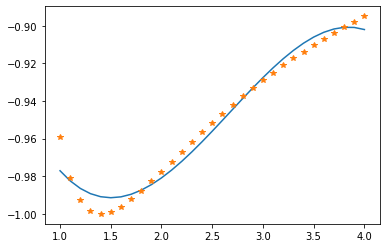

In [6]:
x5 = np.arange(1, 4+0.1, 0.1)
y5 = np.sin(4 + 1/x5)
fit5 = np.poly1d(np.polyfit(x5, y5, 3))
p5 = 2.1
fit5(x)
plt.plot(x5, fit5(x5))
plt.plot(x5, y5, '*')
print(fit5(x).expand())
print(fit5(p5))

### 6) Qual reta no formato $y=kx$ melhor se ajusta aos pontos com coordenadas $x=-2:0.1:2$ e $y=exp(x/10)-1$? Forneça como resposta $k$.

0.100420295642244*x

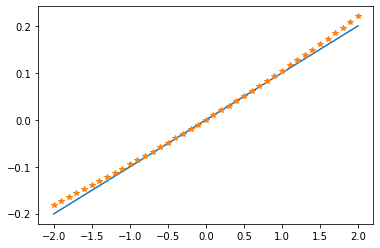

In [7]:
x6 = np.arange(-2, 2+0.1, 0.1)
y6 = np.exp(x6/10)-1
f6 = k*x

fit6 = regressao(x6, y6, f6, [k])
display(fit6.func(x, *fit6.coef))
plt.plot(x6, fit6.coef*x6)
plt.plot(x6, y6, '*')
plt.show()

### 7) Qual parábola do tipo $y=a+bx^2$ melhor se ajusta aos pontos com coordenadas $x=0:0.1:2.5$ e $y=\cos(x)+6$. Forneça o coeficiente $b$.

6.88695449732539 - 0.307360278652075*x**2

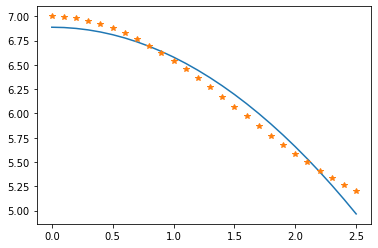

In [9]:
f7 = a + b*x**2
x7 = np.arange(0, 2.5+0.1, 0.1)
y7 = np.cos(x7)+6
fit7 = regressao(x7, y7, f7, [a, b])
display(fit7.func(x, *fit7.coef))
plt.plot(x7, fit7.func(x7, *fit7.coef))
plt.plot(x7, y7, '*')
plt.show()

### 8) Qual parábola do tipo $y(x)=a+bx^2$ melhor se ajusta aos pontos com coordenadas $x=0:0.1:2.5$ e $y=\cos(x)+21$. Forneça $y(1)$.

21.57959421745078

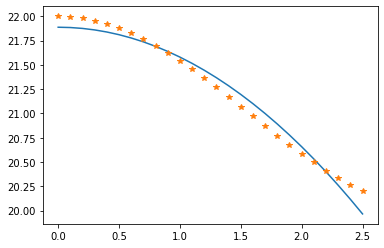

In [10]:
f8 = a +b*x**2
x8 = np.arange(0, 2.5+0.1, 0.1)
y8 = np.cos(x8)+21
p8 = 1
fit8 = regressao(x8, y8, f8, [a, b])
display(fit8.func(p8, *fit8.coef))
plt.plot(x8, fit8.func(x8, *fit8.coef))
plt.plot(x8, y8, '*')
plt.show()

### 9) Qual a curva no formato $y=a+bx+c/x$ que melhor se ajusta aos pontos com coordenadas $x=1:0.1:2.5$ e $y=\cos(x/2+3)$. Forneça o coeficiente $c$.

0.487921458914897*x - 1.83912408348746 + 0.42471657370857/x

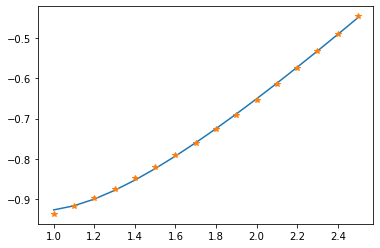

In [23]:
'''
Nao funciona
'''

f9 = a + b*x + c/x
x9 = np.arange(1, 2.5+0.1, 0.1)
y9 = np.cos(3+x9/2)

class regressao2:
    def __init__(self, xx, yy, func, coefs):
        self.func = sp.lambdify([x, *coefs], func)
        if func.has(sp.exp):
            yy = np.log(yy)
            func = sp.log(func).expand(force=True)
        else:
            termosPol = 0
            for termo in func.expand().args: 
                termosPol = termosPol + termo.is_polynomial()
            if termosPol == 0:
                yy = 1/yy
                func = (1/func).expand(force=True)
            elif termosPol < len(func.expand().args):
                yy = yy*xx
                func = (func*x).expand(force=True)
        func = sp.lambdify([x, *coefs], func)
        self.coef, _ = opt.curve_fit(func, xx, yy)

fit9 = regressao2(x9, y9, f9, [a, b, c])
display(fit9.func(x, *fit9.coef))
plt.plot(x9, fit9.func(x9, *fit9.coef))
plt.plot(x9, y9, '*')
plt.show()

### 10) Qual a curva no formato $f(x)=a+bx+c/x$ que melhor se ajusta aos pontos com coordenadas $x=1:0.1:2.5$ e $y=\cos(x/5+3)$. Forneça $f(2.25)$.

-0.952272997248088

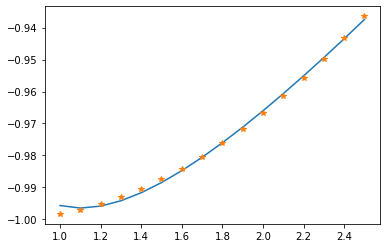

In [22]:
'''
Nao funciona
'''
f10 = a + b*x + c/x
x10 = np.arange(1, 2.5+0.1, 0.1)
y10 = np.cos(3+x10/5)
p10 = 2.25
fit10 = regressao(x10, y10, f10, [a, b, c])
display(fit10.func(p10, *fit10.coef))
plt.plot(x10, fit10.func(x10, *fit10.coef))
plt.plot(x10, y10, '*')
plt.show()